In [31]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = house_votes_84_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [32]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_ordinal_features(data_1)
data_3 = data_processor.encode_nominal_features(data_2)

In [33]:
data_3

,Class Name_democrat,Class Name_republican,handicapped-infants_?,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_?,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_?,adoption-of-the-budget-resolution_n,...,superfund-right-to-sue_y,crime_?,crime_n,crime_y,duty-free-exports_?,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
3,1,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
431,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
432,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
433,0,1,0,1,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [34]:
data_train, data_val = cross_validator.random_partition(data_2, random_state=42)

In [35]:
data_test = data_val.to_numpy()
X_val = data_test[:,2:]
y_val = data_test[:,:2]

In [36]:
train_data = data_train.to_numpy()
X_train = train_data[:,2:]
y_train = train_data[:,:2]

In [37]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=10)

autoE.train(X_train, max_epochs=10000, lr=0.0001)

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
combined = CombinedModel(autoE,n_hidden_2=50,n_output=y_val.shape[1])

loss, val_metrics, final_loss = combined.train(X_train,y_train,X_val,y_val,epochs=15000,lr=0.00001)

Epoch 0/15000, Train Loss: 0.6929682303325889, Val Loss: 0.6929050318332217
Epoch 100/15000, Train Loss: 0.6861460620544935, Val Loss: 0.68347813562347
Epoch 200/15000, Train Loss: 0.6813634195567512, Val Loss: 0.6765166487738901
Epoch 300/15000, Train Loss: 0.6779975119730545, Val Loss: 0.6713262341013977
Epoch 400/15000, Train Loss: 0.6756158882020527, Val Loss: 0.6674154472782149
Epoch 500/15000, Train Loss: 0.6739175511823903, Val Loss: 0.6644344587077073
Epoch 600/15000, Train Loss: 0.6726923933037134, Val Loss: 0.6621326280189657
Epoch 700/15000, Train Loss: 0.6717932013407354, Val Loss: 0.6603290316081692
Epoch 800/15000, Train Loss: 0.6711162969157851, Val Loss: 0.6588919152148561
Epoch 900/15000, Train Loss: 0.6705881154249154, Val Loss: 0.6577243093945799
Epoch 1000/15000, Train Loss: 0.6701558730955997, Val Loss: 0.656753910199184
Epoch 1100/15000, Train Loss: 0.669781051311999, Val Loss: 0.6559259186914905
Epoch 1200/15000, Train Loss: 0.6694348236263875, Val Loss: 0.655197

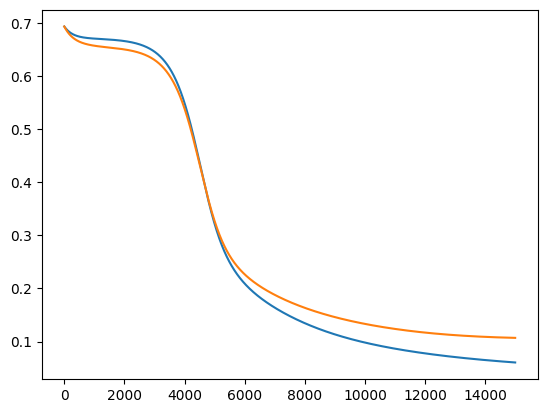

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss)
plt.plot(val_metrics)

In [ ]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=100,n_hidden_2=200,n_output=y_train.shape[1])

loss, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,10000,0.00001)

In [ ]:
val_metrics

[0.6929034475498508,
 0.6927671328722483,
 0.6926313608128116,
 0.6924961282473809,
 0.6923614320719057,
 0.6922272692022713,
 0.6920936365741267,
 0.6919605311427149,
 0.6918279498827049,
 0.6916958897880252,
 0.6915643478716982,
 0.6914333211656781,
 0.6913028067206889,
 0.6911728016060641,
 0.6910433029095888,
 0.6909143077373431,
 0.6907858132135462,
 0.6906578164804037,
 0.6905303146979543,
 0.6904033050439199,
 0.6902767847135566,
 0.6901507509195063,
 0.6900252008916506,
 0.6899001318769666,
 0.6897755411393827,
 0.689651425959637,
 0.6895277836351362,
 0.6894046114798171,
 0.6892819068240077,
 0.6891596670142913,
 0.6890378894133706,
 0.6889165713999347,
 0.6887957103685246,
 0.688675303729404,
 0.6885553489084266,
 0.6884358433469098,
 0.6883167845015045,
 0.68819816984407,
 0.6880799968615485,
 0.6879622630558402,
 0.6878449659436814,
 0.6877281030565212,
 0.6876116719404028,
 0.6874956701558417,
 0.6873800952777088,
 0.6872649448951127,
 0.6871502166112826,
 0.68703590804345

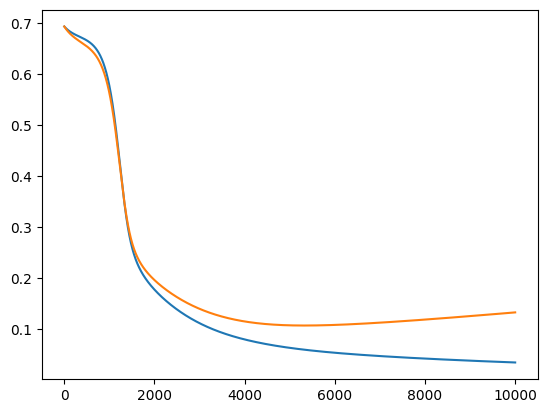

In [ ]:
plt.plot(loss)
plt.plot(val_metrics)

In [ ]:
linear = LinearNetwork(config)

losses, val_losses = linear.logistic_regression(X_train,y_train,X_val,y_val,epochs=10000,lr=0.00001)